# NASA Time versus Voltage data plot code

- In this code block, I will first use some matlab script for extracting some samples from charging cycles and then use python script for combining the samples for plotting the distribution of time versus voltage graph. 
- By using this graph, I can know how the voltage changes over the time and determine the correct cycle for the CC charge range and CV charge range.

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

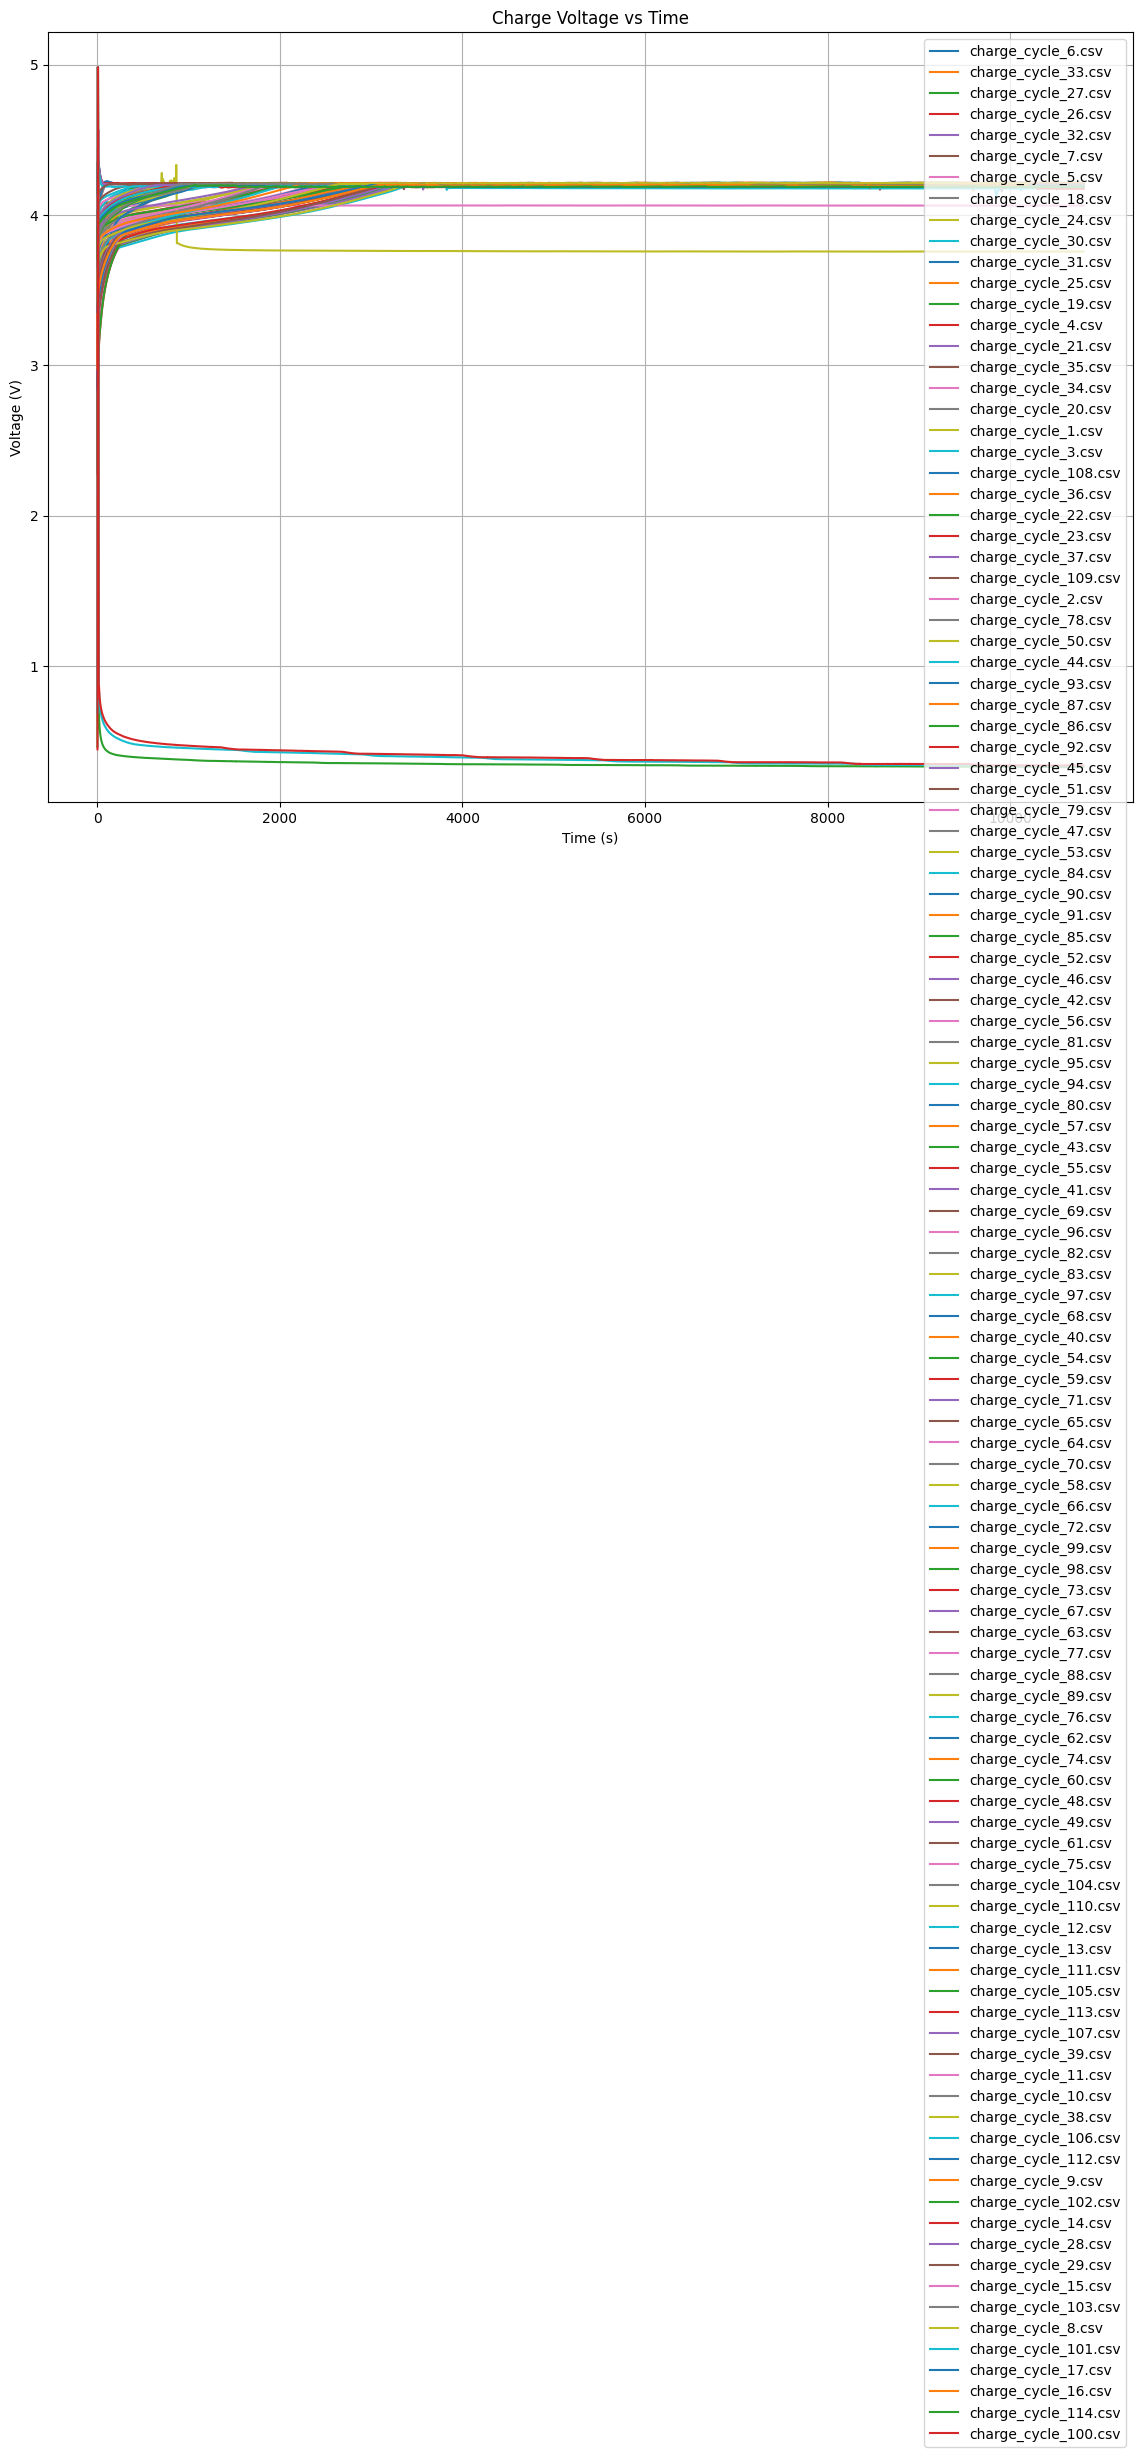

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 获取所有充电和放电循环的CSV文件路径
charge_files = glob.glob('/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/charge_samples/*.csv')
discharge_files = glob.glob('/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/discharge_samples/*.csv')

# 设置绘图样式
plt.figure(figsize=(14, 10))

# 绘制所有充电循环的电压-时间图
for file in charge_files:
    data = pd.read_csv(file)
    plt.plot(data['Time'], data['Voltage'], label=file.split('/')[-1])

plt.title('Charge Voltage vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()


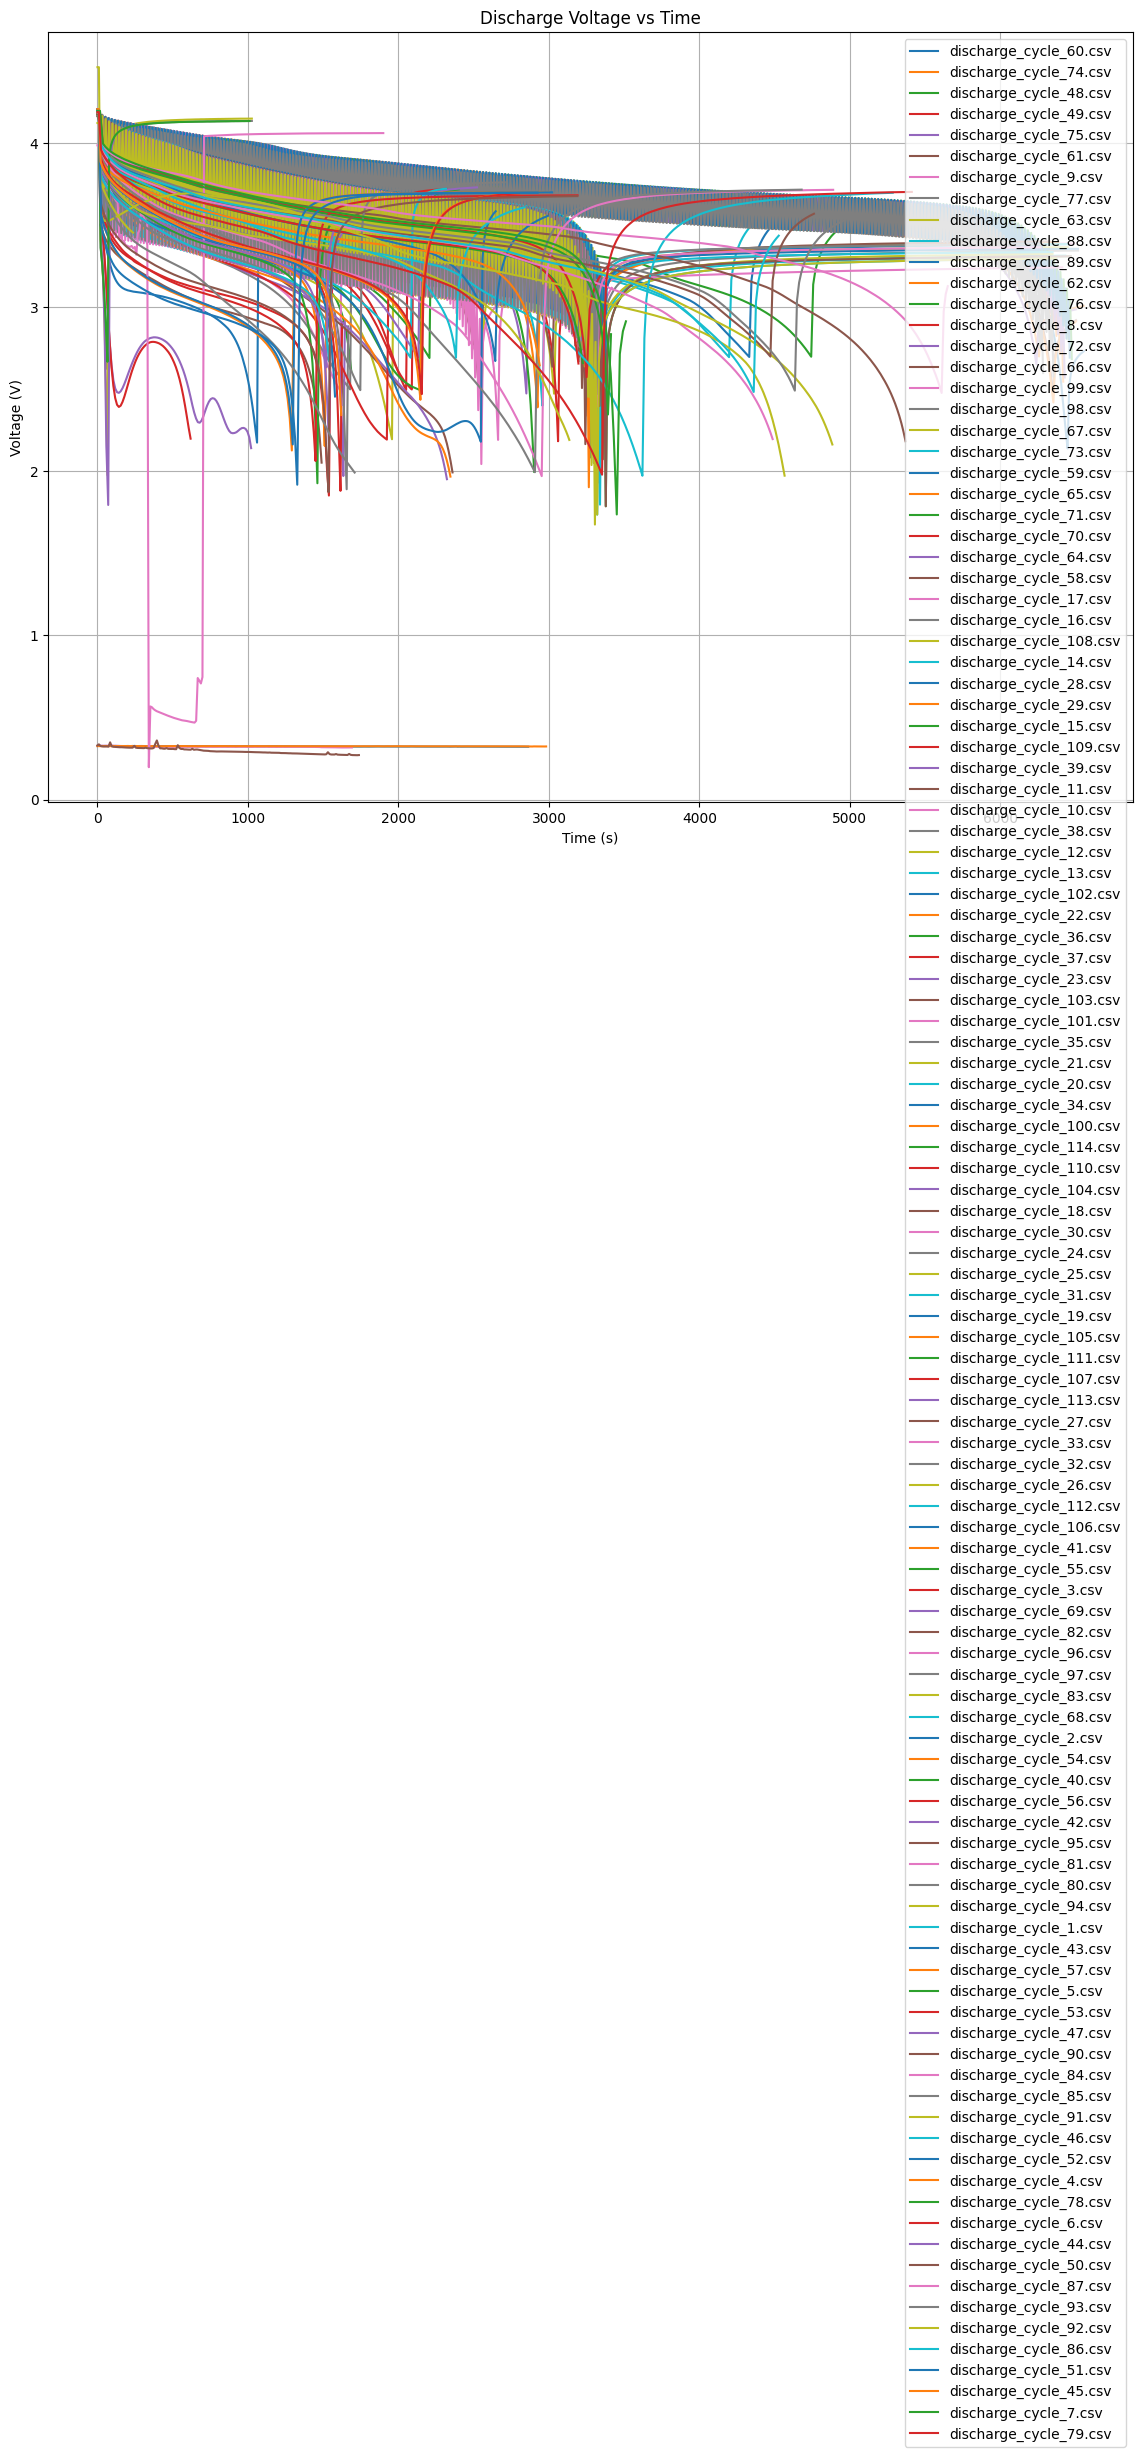

In [4]:

# 绘制所有放电循环的电压-时间图
plt.figure(figsize=(14, 10))

for file in discharge_files:
    data = pd.read_csv(file)
    plt.plot(data['Time'], data['Voltage'], label=file.split('/')[-1])

plt.title('Discharge Voltage vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

# Time versus Voltage(measured) 
while this is for single battery sampling

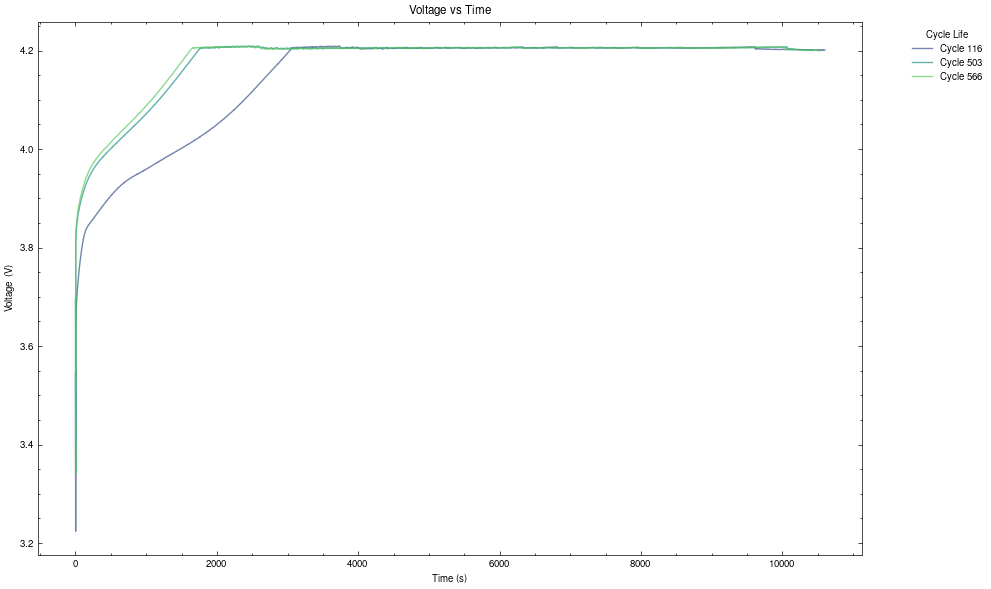

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV数据
data = pd.read_csv('/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/BatteriesCharge/B0005.mat_combined_charge_cycles.csv')

# 确保时间和电压数据是数字类型
data['Time'] = pd.to_numeric(data['Time'])
data['Voltage'] = pd.to_numeric(data['Voltage'])

# 使用seaborn的color_palette生成颜色序列
num_cycles = data['Cycle Life'].nunique()
palette = sns.color_palette("viridis", num_cycles)

# 获取每个Cycle Life对应的颜色
cycle_life_colors = {cycle: color for cycle, color in zip(sorted(data['Cycle Life'].unique()), palette)}

# 绘图
plt.figure(figsize=(10, 6))
for cycle_life, cycle_data in data.groupby('Cycle Life'):
    plt.plot(cycle_data['Time'], cycle_data['Voltage'], color=cycle_life_colors[cycle_life], label=f'Cycle {cycle_life}', alpha=0.7)

# 添加图例
plt.legend(title='Cycle Life', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Voltage vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

# 显示图表
plt.tight_layout()
plt.show()


# Time versus Voltage
we labeled the single battery name and plot them together

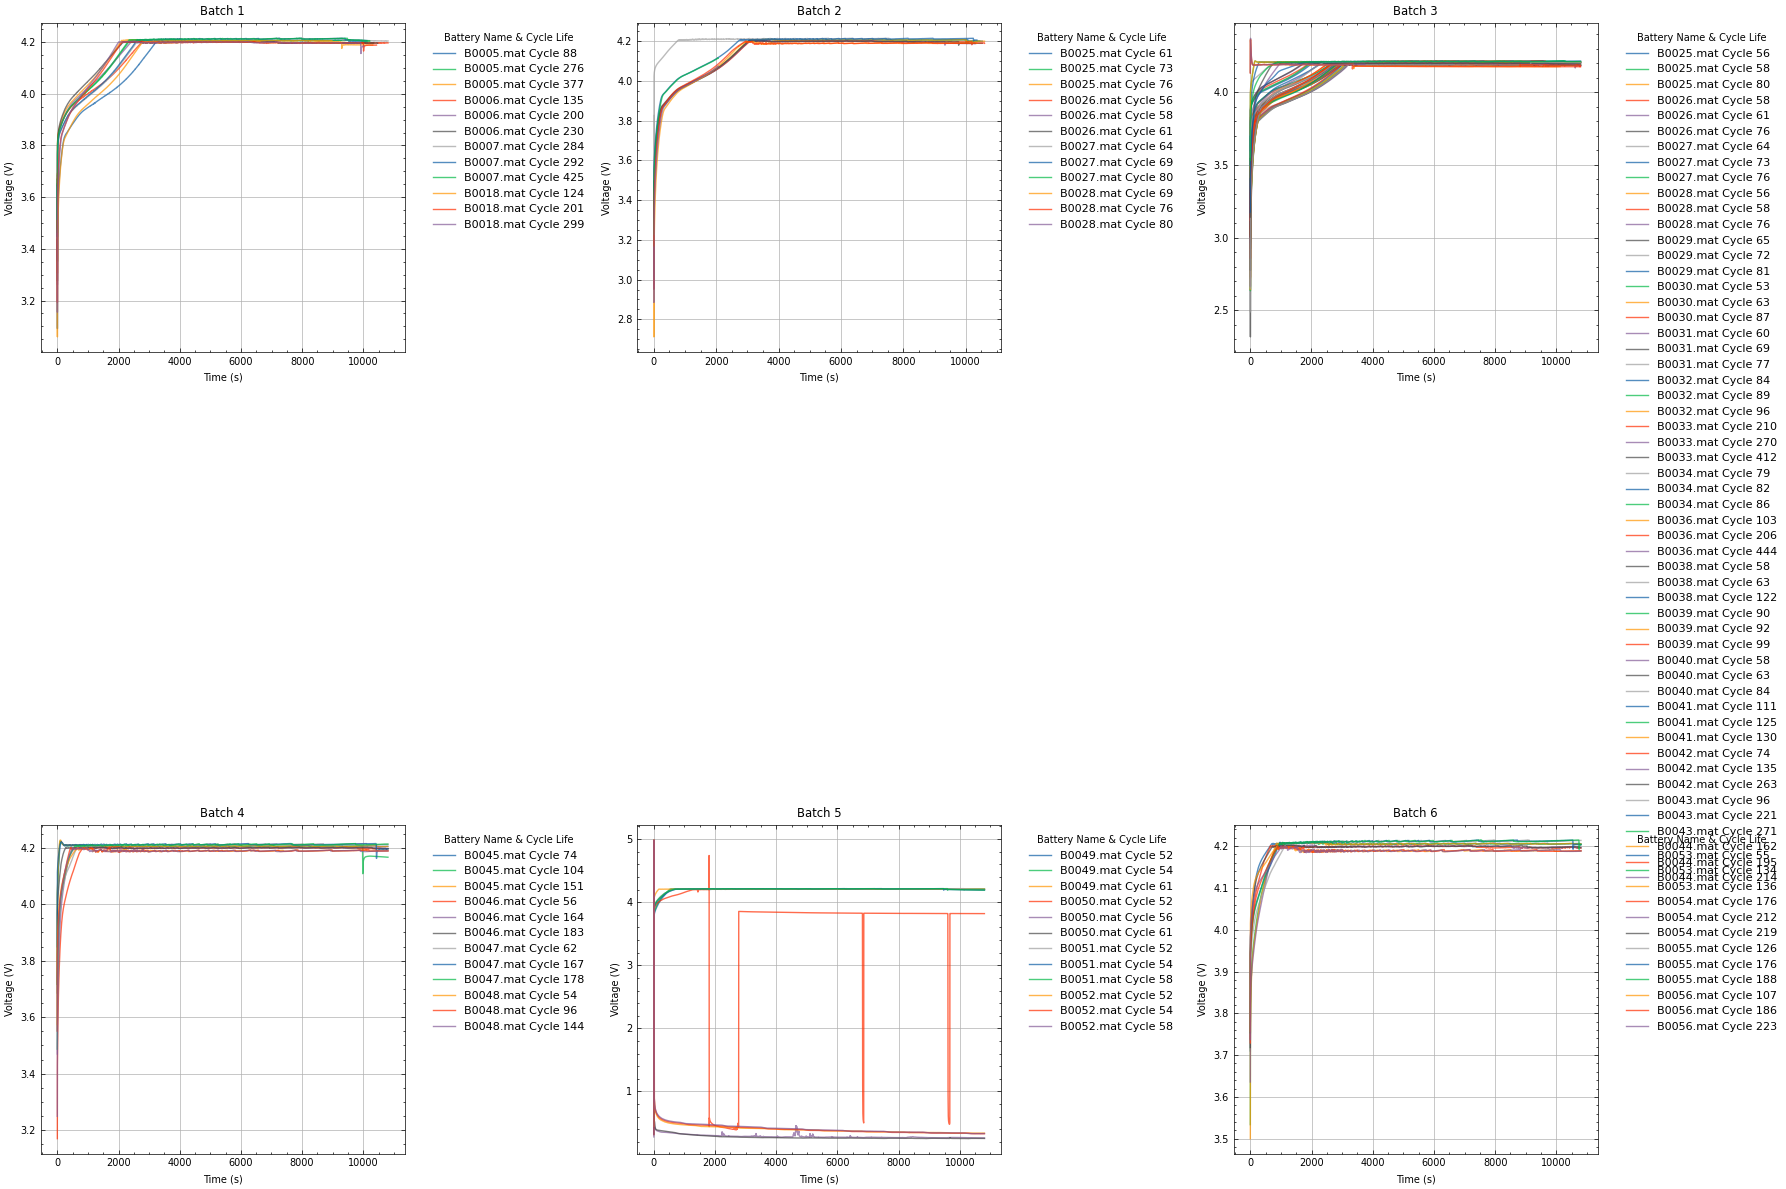

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D
import matplotlib
# 禁用 LaTeX 渲染
matplotlib.rcParams['text.usetex'] = False
# 设置文件夹路径
root = '/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/BatteriesCharge/BatchProcessed'  # 请替换为实际路径
files = [f for f in os.listdir(root) if f.endswith('.csv')]

# 确保文件按照 Batch1, Batch2, ..., Batch6 的顺序
files.sort()

# 定义颜色和标记
colors = [
    '#80A6E2',
    '#7BDFF2',
    '#FBDD85',
    '#F46F43',
    '#403990',
    '#CF3D3E'
]
markers = ['o', 'v', 'D', 'p', 's', '^']
legends = ['Batch 1', 'Batch 2', 'Batch 3', 'Batch 4', 'Batch 5', 'Batch 6']
line_width = 1.0

# 创建一个2x3的子图
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 循环遍历所有文件并绘制数据
for i, file in enumerate(files):
    path = os.path.join(root, file)
    data = pd.read_csv(path)
    
    # 确保时间和电压数据是数字类型
    data['Time'] = pd.to_numeric(data['Time'])
    data['Voltage'] = pd.to_numeric(data['Voltage'])
    
    ax = axes[i // 3, i % 3]
    
    # 按电池名称和循环寿命分组绘图
    for (battery_name, cycle_life), cycle_data in data.groupby(['Battery Name', 'Cycle Life']):
        label = f'{battery_name} Cycle {cycle_life}'
        ax.plot(cycle_data['Time'], cycle_data['Voltage'], label=label, alpha=0.7)
    
    # 设置子图标题和标签
    ax.set_title(legends[i])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (V)')
    ax.legend(title='Battery Name & Cycle Life', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=8)
    ax.grid(True)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()
